KAGGLE BANK DATASET USING SVM 

In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
df = pd.read_csv("/content/bank.csv")

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
df.shape

(11162, 17)

In [ ]:
df.isna().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
df['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [ ]:
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

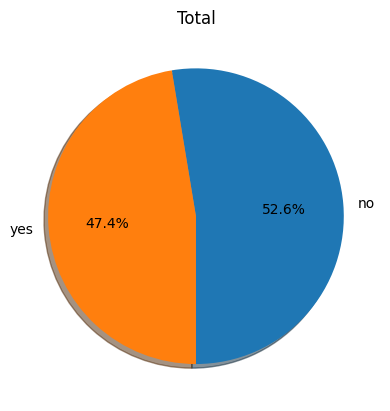

In [ ]:
labels =df['deposit'].value_counts(sort = True).index
sizes = df['deposit'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Total',size = 12)
plt.show()

<ipython-input-28-12a1f2c61648>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True, cmap='GnBu')


<Axes: >

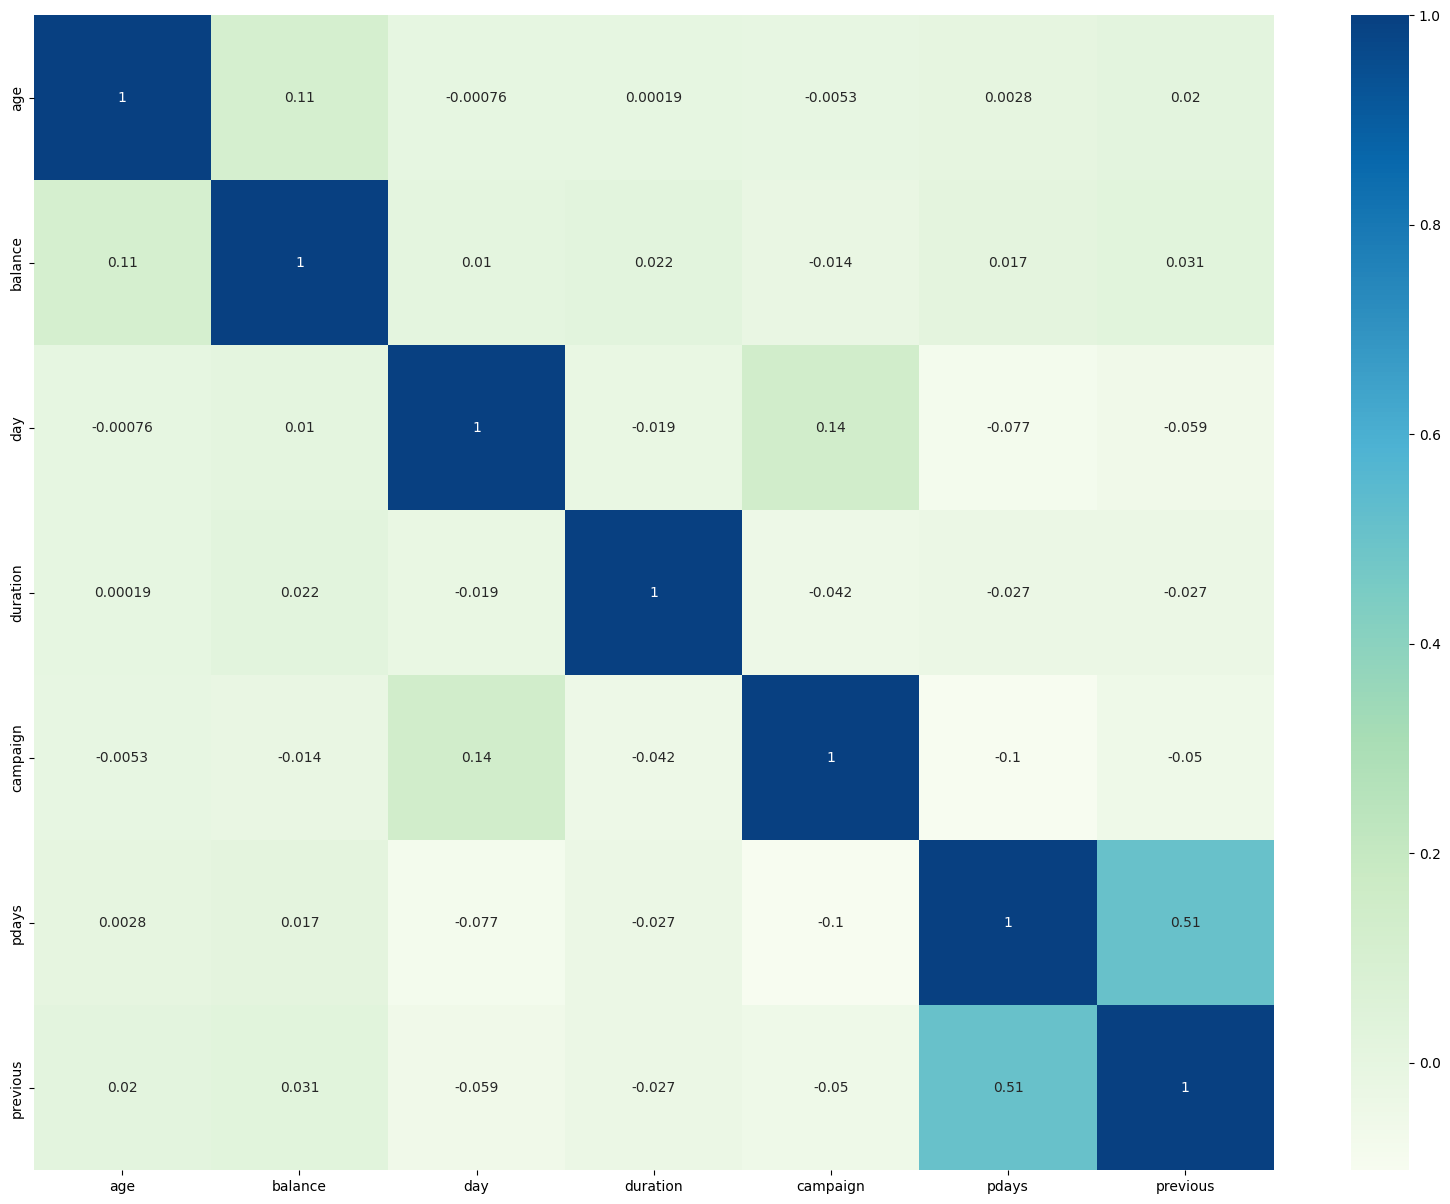

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot= True, cmap='GnBu')

In [ ]:
df.drop(['age','default', 'day'], axis=1, inplace=True)

<ipython-input-30-5709dc0030d3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True, cmap='GnBu')


<Axes: >

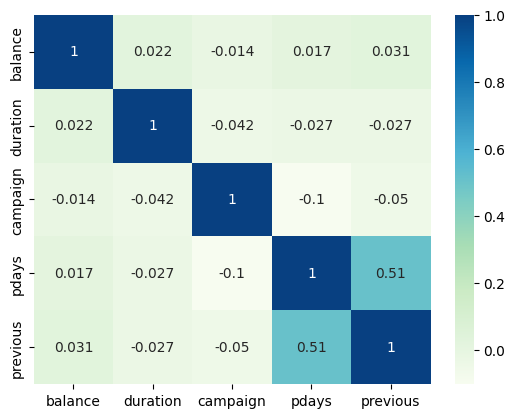

In [ ]:
sns.heatmap(df.corr(), annot= True, cmap='GnBu')


In [ ]:
df[df['pdays']==-1]

,job,marital,education,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,deposit
0,admin.,married,secondary,2343,yes,no,unknown,may,1042,1,-1,0,unknown,yes
1,admin.,married,secondary,45,no,no,unknown,may,1467,1,-1,0,unknown,yes
2,technician,married,secondary,1270,yes,no,unknown,may,1389,1,-1,0,unknown,yes
3,services,married,secondary,2476,yes,no,unknown,may,579,1,-1,0,unknown,yes
4,admin.,married,tertiary,184,no,no,unknown,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,blue-collar,single,secondary,-72,yes,no,cellular,jul,273,5,-1,0,unknown,no
11157,blue-collar,single,primary,1,yes,no,cellular,apr,257,1,-1,0,unknown,no
11158,services,married,secondary,733,no,no,unknown,jun,83,4,-1,0,unknown,no
11159,technician,single,secondary,29,no,no,cellular,aug,156,2,-1,0,unknown,no


In [ ]:

df.drop("pdays",inplace=True,axis=1)


In [ ]:
#dictionary for encoding 
d = {"yes":1,"no":0}

In [ ]:
from sklearn.preprocessing import LabelEncoder
l1= ["deposit","loan","housing"]
for i in l1:
    df[i] = df[i].map(d)

In [ ]:
l2=['month',"contact","poutcome"] #orderdinal encoding
for i in l2:
    le=LabelEncoder()
    df[i]=le.fit_transform(df[i].values)

In [ ]:
df = pd.get_dummies(df, columns = ['job','marital','education']) #one hot encoding

In [ ]:
df=df.reset_index()

In [ ]:
df.drop('index',axis=1,inplace=True)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
X = df.drop('deposit',axis=1)
Y = df['deposit']

In [ ]:
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=1)
for train_index,test_index in sss.split(X,Y):
    train_df = df.loc[train_index]
    test_df = df.loc[test_index]

In [ ]:
X_train = train_df.drop("deposit",axis=1)
Y_train = train_df['deposit']

X_test = test_df.drop("deposit",axis=1)
Y_test = test_df['deposit']

In [ ]:
Y


0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

In [ ]:
from sklearn import svm
from sklearn import metrics 

In [ ]:
svm = svm.SVC(kernel='linear')

svm.fit(X_train_s,Y_train)
Y_pred_svm = svm.predict(X_test_s)

print("Testing Accuracy : ",metrics.accuracy_score(Y_test,Y_pred_svm))


print("Training Accuracy : ",svm.score(X_train_s,Y_train))

Testing Accuracy :  0.7918781725888325
Training Accuracy :  0.8000767950851145


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Confusion matrix, without normalization
[[   5 1757]
 [   0 1587]]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Normalized confusion matrix
[[0.00283768 0.99716232]
 [0.         1.        ]]


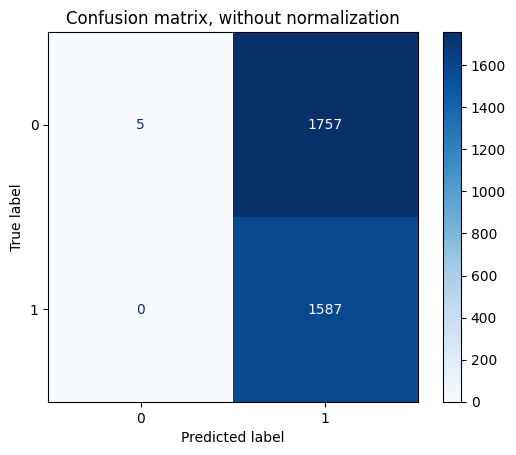

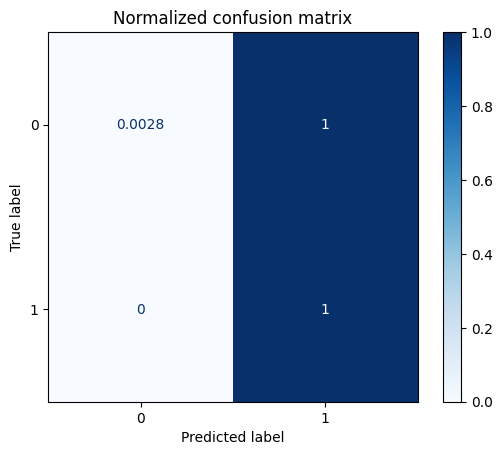

In [ ]:
# Plot non-normalized confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        svm,
        X_test,
        Y_test,
        # display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()